In [19]:
#import libraries
import random
import torch
import torch.nn as nn
import math
from IPython import display

In [10]:

import matplotlib.pyplot as plt


In [11]:
plt.style.use('seaborn-darkgrid')

<ipython-input-11-8bb825865078>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [12]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
seed =12345
random.seed(seed)
torch.manual_seed(seed)
N=1000 #num_samples_per_class
D=2 #dimensions
C=3 #num_classes
H=100 #num_hidden_units

In [15]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2

    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


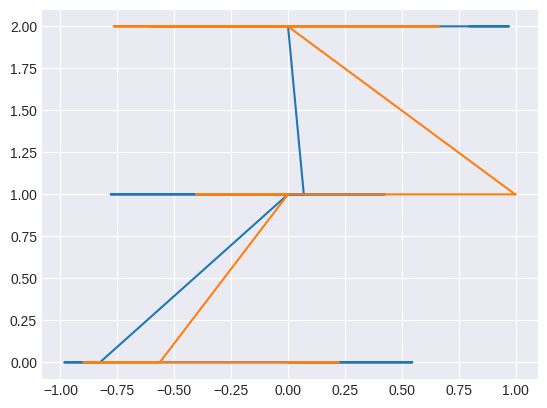

In [16]:
# visualise the data
plt.plot(X, y)

Linear model


In [17]:
learning_rate=1e-3
lambda_12=1e-5

In [21]:
## nn package to create our linear model
#each linear module has a weight and bias
model=nn.Sequential(
    nn.Linear(D,H),
    nn.Linear(H,C)
)
model.to(device) #Convert to cuda
## nn package also has different loss functions.
#we use cross entropy loss for our classification task
criterion=torch.nn.CrossEntropyLoss()
#we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,weight_decay=lambda_12)#built-in L2
#training
for t in range(1000): # Change 'i' to 't' for epoch counter
  # Feed forward to get the logits
  y_pred=model(X)
  #Compute the loss and accuracy
  loss=criterion(y_pred,y)
  score,predicted=torch.max(y_pred,1)
  acc=(y==predicted).sum().float()/len(y)
  print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc)) # Use 't' instead of 'i'
  display.clear_output(wait=True)
  #Zero the gradients before running
  #the backward pass.
  optimizer.zero_grad()
  #perform a backward pass (backpropagation)
  loss.backward()
  #Update the parameters
  optimizer.step()

[EPOCH]: 999, [LOSS]: 0.873481, [ACCURACY]: 0.509


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


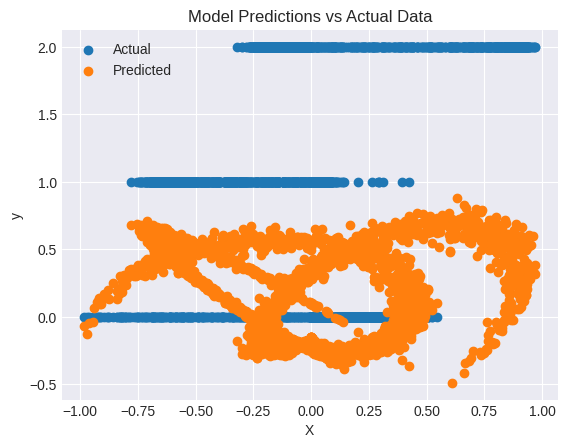

In [24]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Plot trained model
print(model)

# Assuming you want to visualize the model's predictions against the actual data
plt.figure()
# Extract the first feature from X for plotting
plt.scatter(X.detach().cpu().numpy()[:, 0], y.detach().cpu().numpy(), label="Actual")  # Detach from GPU and convert to NumPy if needed

with torch.no_grad():  # Disable gradient calculations for prediction
    y_pred = model(X)
    # Extract the predicted probabilities for the correct class
    predicted_probs = y_pred[torch.arange(len(y)), y].detach().cpu().numpy()
    plt.scatter(X.detach().cpu().numpy()[:, 0], predicted_probs, label="Predicted")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Model Predictions vs Actual Data")
plt.show()

Two-layered network


In [25]:
learning_rate=1e-3
lambda_12=1e-5

In [27]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_12) # built-in L2, use lambda_12 instead of lambda_l2

# e = 1.  # plotting purpose

# Training
for t in range(1000):

    # Feed forward to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()

    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params.
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.183681, [ACCURACY]: 0.943


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


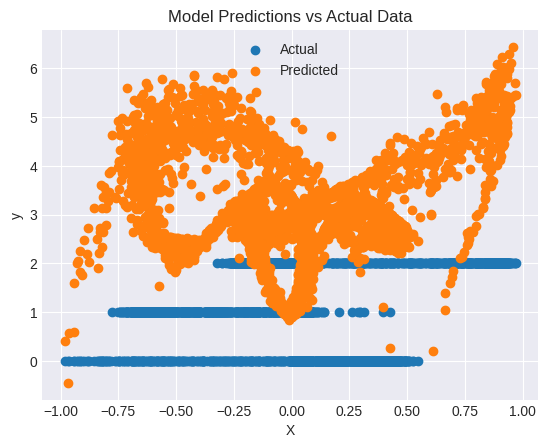

In [29]:

# Plot trained model
print(model)

# Assuming you want to visualize the model's predictions against the actual data
plt.figure()
# Extract the first feature from X for plotting
plt.scatter(X.detach().cpu().numpy()[:, 0], y.detach().cpu().numpy(), label="Actual")  # Detach from GPU and convert to NumPy if needed

with torch.no_grad():  # Disable gradient calculations for prediction
    y_pred = model(X)
    # Extract the predicted probabilities for the correct class
    predicted_probs = y_pred[torch.arange(len(y)), y].detach().cpu().numpy()
    plt.scatter(X.detach().cpu().numpy()[:, 0], predicted_probs, label="Predicted")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Model Predictions vs Actual Data")
plt.show()